# Project- 2 : Par Inc Golf Ball 
### Submitted By : Aman Kumar Agarwal

### Problem Statement: 
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising. <br>One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. 

### Assumptions
1. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design
2. Wind direction and speed is uniform throughout the test

### Questions:
1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls
2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3. Provide descriptive statistical summaries of the data for each model
4. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?
5. Do you see a need for larger sample sizes and more testing with the golf balls? Discuss

## Importing the necessary libraries

In [2]:
import pandas as pd  #Dataframe handling
import numpy as np   #Array manipulation
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
import scipy.stats as stats #Statistical calculations
from scipy.stats import shapiro,levene,ttest_ind 
from statsmodels.stats.power import ttest_power
sns.set(style="dark")
%matplotlib inline

## Reading the dataset

In [3]:
golf = pd.read_excel('D:/Study/AI-ML/Dataset/Project 2 Golf.xls')

In [4]:
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## Structure of data

In [5]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


## Statistical Description of the data

In [6]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [7]:
difference = pd.DataFrame(golf['New'] - golf['Current'],columns=['Difference'])
difference.describe()

,Difference
count,40.000000
mean,-2.775000
std,13.743973
min,-32.000000
25%,-10.750000
50%,-2.500000
75%,6.500000
max,27.000000


## Visualizations

C:\Users\agarw\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


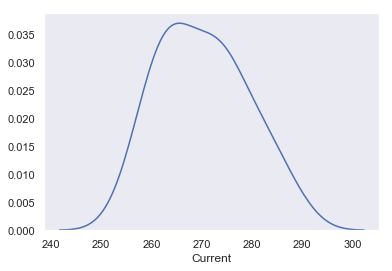

In [8]:
sns.distplot(golf['Current'],hist = None)

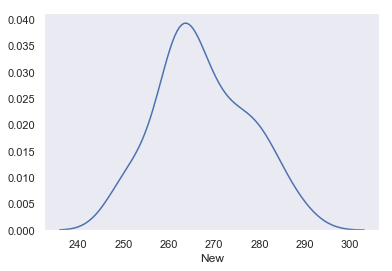

In [9]:
sns.distplot(golf['New'],hist = None)  #slightly right skewed

(array([3., 4., 7., 5., 2., 9., 2., 3., 3., 2.]),
 array([255. , 258.4, 261.8, 265.2, 268.6, 272. , 275.4, 278.8, 282.2,
        285.6, 289. ]),
 <a list of 10 Patch objects>)

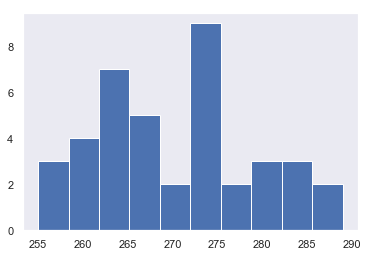

In [10]:
plt.hist(golf['Current'],bins=10)

(array([ 4.,  1.,  4., 11.,  5.,  3.,  4.,  5.,  1.,  2.]),
 array([250. , 253.9, 257.8, 261.7, 265.6, 269.5, 273.4, 277.3, 281.2,
        285.1, 289. ]),
 <a list of 10 Patch objects>)

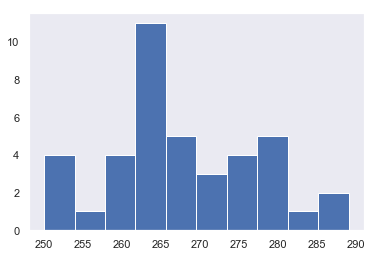

In [11]:
plt.hist(golf['New'],bins=10)

(array([2., 3., 3., 4., 8., 7., 6., 4., 1., 2.]),
 array([-32. , -26.1, -20.2, -14.3,  -8.4,  -2.5,   3.4,   9.3,  15.2,
         21.1,  27. ]),
 <a list of 10 Patch objects>)

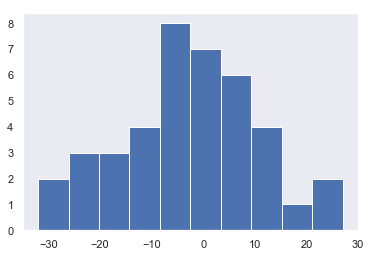

In [12]:
plt.hist(golf['New']-golf['Current'],bins=10)

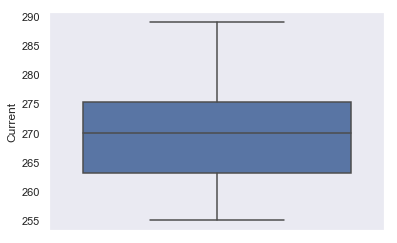

In [13]:
sns.boxplot(y=golf['Current'])

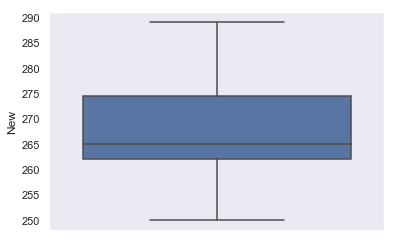

In [14]:
sns.boxplot(y=golf['New'])

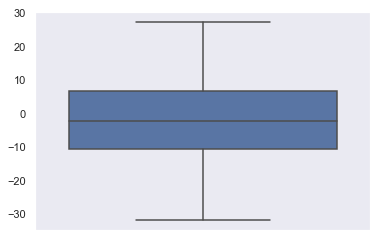

In [15]:
sns.boxplot(y=golf['New']-golf['Current']) 

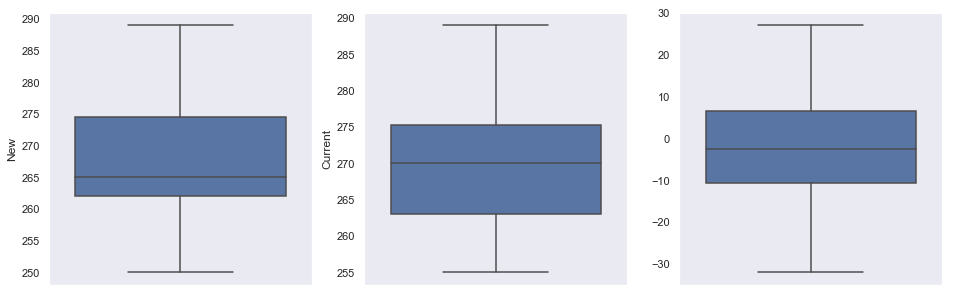

In [16]:
f,axes = plt.subplots(1,3,figsize=(16,5))
sns.boxplot(y=golf['New'],ax = axes[0])
sns.boxplot(y=golf['Current'], ax = axes[1])
sns.boxplot(y=golf['New']-golf['Current'], ax = axes[2]) 

# <u>Formulating the Hypothesis</u>

## Null Hypothesis  (Ho):
###  Driving_distance(current) = Driving_distance(new)
<br>
There is no significant difference between the driving distances of the Current model golf balls and the New model golf balls. Therefore the new coating has no significant effect and the driving distances are comparable as the company's liking. The new balls are cut-resistant, longer lasting and therefore they should introduce the new design ball. 

##  Alternate Hypothesis (H1):
### Driving_distance(current) ≠ Driving_distance(new) <br>
There is a significant difference between the driving distances of the Current model golf balls and the New model golf balls. Therefore the new coating has significant effect on the driving distances, thus making them non-comparable, therefore the company should not introduce the new design ball.

# Shapiro Test - Test for Normality

In [17]:
shapiro(golf['Current']) #p > 0.05 ==> Not enough evidence to reject Ho, therefore data comes from normally distributed population

(0.9707046747207642, 0.378787100315094)

In [18]:
shapiro(golf['New'])    # p > 0.05 ==> Not enough evidence to reject Ho, therefore data comes from normally distributed population

(0.9678263664245605, 0.3064655363559723)

# Levene Test - Test for equality of variance

In [19]:
levene(golf['Current'],golf['New']) # p > 0.05 ==> Not enough evidence to reject Ho, therefore variances are equal

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

# Testing the hypothesis

1. When the sample size (n) increases to greater than 30, statistical theory states that it then follows normal distribution. However since the population standard deviation is not known, a T-test can be used as a t-distribution approaches a normal distribution for sample size greater than 30. 
2. The t statistic for a two sample test is given by : <br>
 <u>(x1_bar - x2_bar) - (mu1 - mu2)</u> <br> sqrt( SE1** 2 + SE2** 2 ) <br>
4. where : <br><b> x1_bar and x2_bar</b> are the difference in sample mean, <br> <b> (mu1 - mu2) </b> is the  difference between the hypothesised mean, (0) in this case, <br> <b>SE1 and SE2 </b>are the standard errors of the two samples.
5. We see that the given sample data belongs to two similar populations and are subjected to the same test. There is no dependency or relation between the "Current" distance and the "New" distance, therefore the data is INDEPENDENT and UNPAIRED.
5. This value of t is the T test value for an <b>Independent and normally distributed sample</b>, which is given by the ttest_ind() test. 
6. The sample size is sufficiently large to use z-test but since the population standard deviation is not known, a two sample t-test is used. 
7. Since our aim is to indentify if there is an effect of the new design on the distance or not, a two-tailed test is used.

## Two Sample T - Test

### Conducting the test

In [20]:
t_statistic,p_value = ttest_ind(golf['New'],golf['Current'])
t_statistic,p_value    #0.188 is the two tailed probability (p-value).

(-1.3283615935245678, 0.18793228491854663)

### T Statistic for 95% Confidence interval for the individual samples

In [21]:
t_stat_95 = stats.t.ppf(0.025,39) #95% confidence for 39 degrees of freedom
t_stat_95

-2.0226909117347285

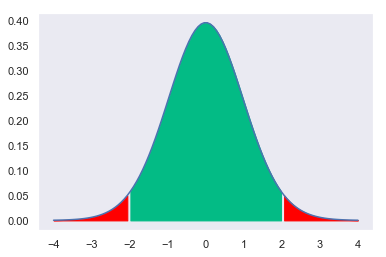

In [22]:
x = np.linspace(-4,4,100)
y = [stats.t.pdf(i,39) for i in x]
line = plt.plot(x,y)
plt.fill_between(x,y,color="red",where = (x<t_stat_95))
plt.fill_between(x,y,color="red",where = (x>(-t_stat_95)))
plt.fill_between(x,y,color="#03bb85",where = (x>t_stat_95) & (x<(-t_stat_95)))

### Critical Value Approach
The rejection of Ho areas are shown in RED colour and the acceptance area of Ho is shown in green. <br>
Clearly the test statistic (1.33) falls in the acceptance area and therefore by the critical value approach, there is not enough evidence to reject the Null Hypothesis.

### P-Value Approach
The P value (two-tailed) of <b>0.188</b> indicates that it is greater than the significance level (0.05), thus indicating that there is not enough evidence to reject the Null Hypothesis (Ho), thus indicating that the mean of the two samples are the same. 

# Power of the Test

In a two sample T-Test we must calculate the pooled standard deviation for the power of the test.

### Calculating the pooled standard deviation & power

In [1]:
n1 = golf['Current'].count()    # Number of samples of group 1 - 40
n2 = golf['New'].count()        # Number of samples of group 2 - 40
var1 = (golf['Current']).var()  # Variance of group 1 - 76.61
var2 = (golf['New']).var()      # Variance of group 2 - 97.95

NameError: name 'golf' is not defined

In [24]:
s_pool = np.sqrt( (((n1-1)*var1)  + ((n2-1)*var2)) / (n1+n2-2))
s_pool #Pooled standard deviation

9.342469200871404

In [25]:
delta = ( np.mean(golf['Current']) - np.mean(golf['New']) ) / s_pool
delta

0.2970306821820877

In [26]:
power = ttest_power(delta,n1,alpha=0.05,alternative="two-sided")   
power

0.4492741885390423

There is 44.93 % chance of null hypothesis being false and rejecting the null hypothesis. (1-β)

# Confidence Intervals 

We calculate the confidence interval by <br> 
CI_1 = Mean_of_sample + (T_stat * SE ) <br>
CI_2 = Mean_of_sample - &nbsp;(T_stat * SE ) <br><br>
Where <br>
<b>CI_1,CI_2:</b> Two limits of the confidence interval <br>
<b>T-stat   :</b> T value at <b>95%</b> confidence * <br> 
<b>SE:</b> Standard Error which is given by (Estimated standard deviation of population / square root of sample size) <br><br>
*Z-stat for 95% confidence (1.96) could also be used. The confidence intervals generated are almost identical. So here t_stat is used.

## Standard Deviations (Estimate) and Standard Errors

We must note here that when the <i>Population</i> standard deviation is not known (as in this case), then the population standard deviation is <i>estimated</i> using an adjustment factor of <i>n-1</i> instead of <i>n</i>

### Current Model

In [27]:
estimate_std_dev_of_population_1 = np.sqrt(sum( ( ( golf['Current']-golf['Current'].mean() ) ** 2 ) / (len(golf['Current'])-1) ))
SE1 = estimate_std_dev_of_population_1/np.sqrt(40) 
estimate_std_dev_of_population_1,SE1

(8.752984838884597, 1.383968420789864)

### New Model

In [28]:
estimate_std_dev_of_population_2 = np.sqrt(sum( ( ( golf['New']-golf['New'].mean() ) ** 2 ) / (len(golf['New'])-1) ))
SE2 = estimate_std_dev_of_population_2/np.sqrt(40)
estimate_std_dev_of_population_2,SE2

(9.896904462947894, 1.5648379944000428)

### Difference of means Model 

In [29]:
SE3 = np.sqrt( (SE1**2) + (SE2**2) )
SE3

2.08903962108466

### Confidence Interval of <i> "Current" </i> Model

In [30]:
ci_1_left  = np.mean(golf['Current']) + (t_stat_95*SE1)
ci_1_right = np.mean(golf['Current']) - (t_stat_95*SE1)
ci_1_left,ci_1_right

(267.47565965314044, 273.0743403468595)

### Confidence Interval of <i> "New" </i> Model

In [31]:
ci_2_left  = np.mean(golf['New']) + (t_stat_95*SE2)
ci_2_right = np.mean(golf['New']) - (t_stat_95*SE2)
ci_2_left,ci_2_right

(264.3348164103898, 270.6651835896102)

### Confidence Interval of <i> "Difference of Means" </i> Model

In [32]:
diff_of_mean = np.mean(golf['Current'] - golf['New'])
diff_of_mean

2.775

In [33]:
t_value = stats.t.ppf(0.025,78)   # n1+n2-2
t_value

-1.9908470685550523

In [34]:
ci_3_left  = diff_of_mean + (t_value*SE3)
ci_3_right = diff_of_mean - (t_value*SE3)
ci_3_left,ci_3_right

(-1.3839584057317524, 6.933958405731753)

# Managerial Report

## 1. Rationale for hypothesis

Par Inc. can conduct an independent 2 sample T-Test to compare the driving distances of the two models of golf balls. </br>
They can set up the hypothesis as: <br>
1. Null hypothesis representing no significant difference in the driving distance between the current balls and the newly designed balls and <br>
2. Alternate hypothesis representing significant difference in the driving distance between the two design of golf balls.

## 2. Hypopthesis testing Conclusion 

1. The hypothesis tests conducted above clearly show that there is not enough evidence to reject the null hypothesis. Thus accepting the null hypothesis. This indicates that there is no significant difference between the driving distances of the two designs of galf balls. <br>
2. T statistic (1.33) is far away from the rejection area or the critical T value (2.022) for 95% confidence which indicates the failure to reject the null hypothesis. <br>
3. The P-value of the test (two tailed) is 0.188 ( 0.18 > 0.05 ), which is greater than the significance level (0.05) thus not providing enough evidence to reject the null hypothesis.

## 3. Analyzing the data 

1. The Box plots for the different models (Current and New) show us that the samples lie mostly between the 260 - 275 yards range.
2. The Box plot for the difference of means clearly represents a marginal difference between the means of the two samples with the median nearly at 0. This also gives the idea that there is no significant difference between the two samples which is further tested by the various statistical tests. 
3. The Shapiro test conducted in the given data set gives a p-value of 0.38 for "Current Model" and 0.30 for "New Model" both of which are greater than the significance level ( 0.05 ), which indicates the failure to reject the Null Hypothesis thus indicating that the samples are from a normally distributed population. 
4. The levene test provides a p-value of 0.615 which is greater than 0.05, thus indicating the failure to reject the null hypothesis for levene test. Therefore, the two samples have equal variances. 
5. Even though the New driving distance may look greater than the Current model, statistically there is no significant difference. It is only due to the higher variance in the New Model as the new model variance (97.95) is greater by approximately 28% than the Current model (76.61) 
6. The frquency distribution (histogram) for the two models show that the samples have maximum frequency in the  approxixmate range of 272 - 275 yards for the Current Model and 262 - 267 yards for the New Model
7. The frequency distribution (histogram) for the difference of means shows that most of the data is distributed around zero.
8. The box plots depict the absence of any outliers in the sample.
9. There is no missing data in the samples.
10. The pooled standard deviation of the sample is 9.34.
11. The power of the test is 45% which means that there is 45% chance of null hypothesis being false and rejecting the null hypothesis.

# 4. Descriptive Statistical Summaries

## Current Model

1. There are 40 samples in the current model.
2. The average (mean) of the samples is 270.275.
3. The standard deviation of the Sample is 8.75.
4. The minimum distance (in yards) is 255 yards.
5. The maximum distance (in yards) is 289 yards.
6. The 25th quartile is 263 yards
7. The 75th quartile is 275 yards

## New Model

1. There are 40 samples in the current model.
2. The average (mean) of the samples is 267.50.
3. The standard deviation of the Sample is 9.90.
4. The minimum distance (in yards) is 250 yards.
5. The maximum distance (in yards) is 289 yards.
6. The 25th quartile is 262 yards
7. The 75th quartile is 274 yards

## Difference of means Model

1. There are 40 samples in the current model.
2. The average (mean) of the difference is 2.775.
3. The standard deviation of the Sample is 13.74.
4. The minimum distance (in yards) is -32 yards.
5. The maximum distance (in yards) is 27 yards.
6. The 25th quartile is -10.75 yards
7. The 75th quartile is 6.50 yards

# 4. Confidence Intervals 

## Current Model

1. The mean is : 270.275.
2. The standard error ( SE1 ) is : 1.384
3. The 95% T-value is : -2.023
4. The lower limit of confidence interval : 267.476
5. The upper limit of confidence interval : 273.074
6. The difference between the confidence interval : 5.60

## New Model

1. The mean is : 267.50
2. The standard error ( SE2 ) is : 1.565
3. The 95% T-value is : -2.023
4. The lower limit of confidence interval : 264.335 
5. The upper limit of confidence interval : 270.665
6. The difference between the confidence interval : 6.33

## Difference of means Model

1. The mean is : 2.775
2. The standard error ( SE3 ) is : 2.089
3. The 95% T-value is : -1.99
4. The lower limit of confidence interval : -1.384 
5. The upper limit of confidence interval :  6.934
6. The difference between the confidence interval : 8.32

# 5. Need for larger data set

1. We clearly see from the above analysis that the 95% confidence intervals are very narrow. This means that with 95% confidence, we can say that the actual population mean for the diffefrent models lie within their respective range of confidence interval values. 
2. We also know that the confidence interval varies directly with the standard error of the sample. And with increase in sample size, the standard error will reduce which will lead to an even narrower confidence interval. 
3. 95% of the times the true population mean will lie within this interval.  
4. Since our 95% confidence interval is already significantly narrow, the population mean can be estimated with a good precision and there is no further need of a greater sample size.

# Conclusion

1. The golf balls designed by Par Inc. have no significant difference in the driving distances between their previous design and the new cut-resistant design of the golf balls. There is not enough evidence to say that the new designs cover a greater distance than the older one. Therefore it can be said that the driving distances of the two designs are comparable.
2. The Null Hypothesis stands true in the scenario as there is not enough evidence to reject the null hypothesis.
3. With the narrow confidence intervals, the increase in sample size will only reduce the width of the confidence interval and make the estimator more accurate. But as the interval is already so narrow with 95% confidence, there is no need for a larger sample size as it will give us the same conclusion.
4. Par Inc should also consider other factors like weight of the ball, ground conditions for the test. 
5. The test should be done on atleast 4-5 different grounds or golf courses so that a more accurate analysis can be done.
6. Par Inc desired that the driving distances be comparable with the new cut-resistant technology, and with the above testing we see that the new coating does not have a significant difference in the distance of the new golf balls. Therefore the driving distances are similar just as desired by the company. 
7. The new coating on the golf balls therefore produce a cut-resistant, longer lasting and durable ball with the same driving distance as the previous design. It is in alignment with the company's requirements and therefore the product should be launched in the market. 